[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]]
Current state:


Matrix([
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[1],
[0],
[0]])

After 5 steps:


Matrix([
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[1]])

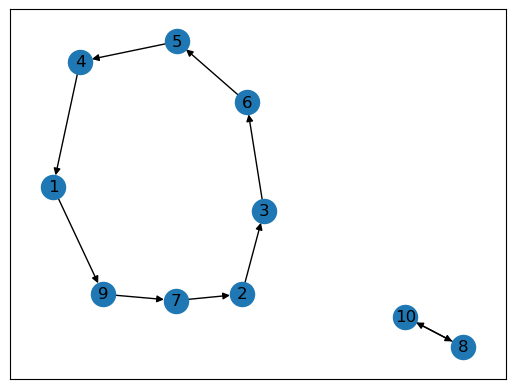

In [2]:
import networkx as nx
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power
#lab 1.3
#1 uzd 8 var.
#funkcija, kuri skaičiuoja būsenos pakeitimą po  k  laiko žingsnių. Taip pat pateikite sistemos grafą

def stateChange(m, state, n):
    mp = m**n
    mp = mp*state
    return mp

matrix = np.matrix([
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0],
])

state = sp.zeros(10, 1)

state[7,0]=1

print (matrix)

print ("Current state:")
display(state)

print("After 5 steps:")
display(stateChange(matrix, state, 3))

#graphing the given matrix
graph = nx.DiGraph()

graph.add_edges_from([(1,9),(2,3),(3,6),(4,1),(5,4),(6,5),(7,2),(8,10),(9,7),(10,8)],weight=1)


nx.draw_networkx(graph, arrows=True)



In [5]:
import random


# 2 uzd
# Parašykite funkciją, kuri generuoja atsitiktinę dvigubai stochastinę matricą nurodytos eilės  N . Taip pat
# parašykite funkcijas, kurios:
#   1. patikrina, ar duotoji kvadratinė matrica yra dvigubai stochastinė;
#   2. apskaičiuoja sistemos būseną po  k  žingsnių pagal duotąją pradinę būseną. Atkreipkite dėmesį į tai, kad  k  gali būti ir neigiamas.

def generate(n: int):
    matrix = sp.zeros(n,n)
    
    for i in range (n):
        for j in range (n):
            matrix[i,j]=sp.Rational(1, n)
    
    c = random.randint(1, n**3)
    for i in range(c):
        x1 = random.randint(0, n-1)
        y1 = random.randint(0, n-1)
        x2 = random.randint(0, n-1)
        y2 = random.randint(0, n-1)

        a = random.randint(1, n*n)
        b = random.randint(a, a**2)

        d = sp.Rational(a, b)

        if d<matrix[x1,y1] and d<matrix[x2,y2]:
            matrix[x1,y1]-=d
            matrix[x2,y2]-=d
            matrix[x1,y2]+=d
            matrix[x2,y1]+=d

    return (matrix)



def isStoch(n, matrix):
    for i in range(n):
        s1=0
        s2=0
        for j in range(n):
            s1+=matrix[i,j]
            s2+=matrix[j,i]
        if s1!=1 or s2 != 1:
            return False
    return True



def findStatus(n, m, state):
    if n<0 and m.det()==0:
        return "Failed. Determinant = 0"
    else:
        mp = m**n
        mp = mp*state
        return mp


size = 3

m = generate(size)
display (m)

print("Is doubly stochastic: ", isStoch(size, m))

state = sp.zeros(size, 1)

state[0,0]=1

display(state)

display(findStatus(1, m, state))
display(findStatus(3, m, state))
display(findStatus(-3, m, state))


Matrix([
[    50/231,    8/15, 289/1155],
[    67/138,  25/138,      1/3],
[3167/10626, 197/690, 481/1155]])

Is doubly stochastic:  True


Matrix([
[1],
[0],
[0]])

Matrix([
[    50/231],
[    67/138],
[3167/10626]])

Matrix([
[    23195695553/72451787100],
[       428773319/1236653880],
[1110236116457/3332782206600]])

Matrix([
[10904543639/113799168],
[ 8763370967/113799168],
[ -9777057719/56899584]])

In [7]:
import math
from sympy import I, re, im

# 3 uzd
#Parašykite funkciją, kuri generuoja atsitiktinę kvantinės sistemos matricą nurodytos eilės  N. Taip pat parašykite funkcijas, kurios:
#   1.patikrina, ar duotoji kvadratinė matrica yra kvantinės sistemos dinamikos matrica;
#   2. apskaičiuoja sistemos būseną po  k  žingsnių pagal duotąją pradinę būseną. Atkreipkite dėmesį į tai, kad  k  gali būti ir neigiamas;
#   3.apskaičiioja tikimybę pereiti nuo būsenos  i  į būseną  j  per laiką  T , jeigu žinoma, kad nuliniu laiko momentu sistema buvo būsenoje  i  su tikimybe  1 .


def quantumMatrix(n):
    matrix = np.zeros((n,n), dtype=complex)

    for i in range(n):
        for j in range(n):
            real = np.random.randint(-10,10)
            im = np.random.randint(-10, 10)
            matrix[i,j]= complex(real, im)


    
    Q, R= np.linalg.qr(matrix)
    

    return Q

def isQuantum (matrix, size):
    for i in range(size):
        prob=0
        for j in range(size):
            prob += np.sqrt(np.real(matrix[j, i])**2+np.imag(matrix[j,i])**2)**2
        if not math.isclose(prob, 1):
            return False

    return True

def findStatus(n, m, state):
    mp = m**n
    mp = mp*state
    return mp


def probFromItoJ (m, i , j, t, size)-> float:
    state = sp.zeros(size, 1)
    state [i, 0] = 1
    mp = findStatus(t, m, state)

    return re(mp[j])**2+im(mp[j])**2


size = 3
m = quantumMatrix(size)
print (m)

print ("Is quantum system dynamic matrix:", isQuantum(m, size))

state =sp.zeros(size, 1)
state[0,0]=1

print ("\nState:")
display (state)

display (findStatus(3, m, state))
display (findStatus(2, m, state))
display (findStatus(-3, m, state))


# the matrix, from where, to where, size of matrix
print ("Probability from 2 to 1: ", probFromItoJ(m, 2, 1, 5, size))



[[-0.14784425+0.29568851j  0.54045343+0.42736507j -0.60166298-0.2323386j ]
 [-0.36961064-0.59137702j -0.29089017-0.10700145j -0.61442146+0.20020259j]
 [ 0.36961064-0.51745489j  0.2562909 +0.60292434j  0.170177  +0.3707633j ]]
Is quantum system dynamic matrix: True

State:


Matrix([
[1],
[0],
[0]])

Matrix([
[0.0355472523737718 - 0.00646313679523123*I],
[   0.33729495150113 - 0.0355472523737718*I],
[ -0.246407090318191 - 0.0735181810457553*I]])

Matrix([
[-0.0655737704918033 - 0.0874316939890711*I],
[  -0.213114754098361 + 0.437158469945355*I],
[  -0.131147540983607 - 0.382513661202186*I]])

Matrix([
[ 27.2313592572974 + 4.95115622859953*I],
[ 2.93219662912881 + 0.30902192019561*I],
[-3.72658739295515 + 1.11186705822596*I]])

Probability from 2 to 1:  0.0126991723276797


In [8]:
# 4 uzd
#Tam tikros kvantinės sistemos būsenos aprašomos vektoriumi. Raskite kiekvienos būsenos tikimybę.

from numpy.linalg import norm

state = np.array([1-4j,3j,-6-3j,5+7j,2-7j,-6+2j,4j,4+2j], dtype=complex)

print (state)

normOfState = np.linalg.norm(state)
normalized=state/normOfState
print ("\n",normalized)
sum=0
for i in normalized:
    
    prob = i.real**2+i.imag**2
    print (prob)
    sum+=prob


[ 1.-4.j  0.+3.j -6.-3.j  5.+7.j  2.-7.j -6.+2.j  0.+4.j  4.+2.j]

 [ 0.06041221-0.24164884j  0.        +0.18123663j -0.36247326-0.18123663j
  0.30206105+0.42288547j  0.12082442-0.42288547j -0.36247326+0.12082442j
  0.        +0.24164884j  0.24164884+0.12082442j]
0.062043795620437964
0.03284671532846716
0.16423357664233582
0.27007299270072993
0.19343065693430658
0.14598540145985406
0.05839416058394161
0.07299270072992702


In [12]:

# 5 uzd
# Vektorių  ψ  iš praeitos užduoties normuokite ir paskaičiuokite jo tranzicijos amplitudę į vektorių  ϕ  (kurį irgi normuokite).

vect = np.array([7+3j, -6-7j, 5+5j, -4-1j, -6-3j, 3-6j, -6+5j, -8-2j], dtype=complex)

vectNorm = np.linalg.norm(vect)
normalizedVec = vect/vectNorm
print (normalizedVec)

transAmplitude = np.vdot(normalizedVec, normalized)

print ("Transitional amplitude:\n", transAmplitude)

[ 0.33796318+0.14484136j -0.28968273-0.33796318j  0.24140227+0.24140227j
 -0.19312182-0.04828045j -0.28968273-0.14484136j  0.14484136-0.28968273j
 -0.28968273+0.24140227j -0.38624364-0.09656091j]
Transitional amplitude:
 (-0.3937584084724599-0.20708775556699743j)


In [105]:
# 6 uzd

#Parašykite Python funkciją, kurios parametrai - dvi sympy matricos ir kuri grąžina jų komutatorių. Pademonstruokite funkcijos veikimą naudodami matricas, kuriose yra sympy simbolių.

def findCommutator (A, B):
    return A*B-B*A


a = sp.Matrix([[sp.Rational(1, 30), complex(3, 2)],[1,2]], dtype=complex)
b = sp.Matrix([[1, sp.sqrt(2)],[sp.Rational(1, 2) ,1]])

display(a)
display(b)

print("Commutator:")
display (findCommutator(a,b))

Matrix([
[1/30, 3.0 + 2.0*I],
[   1,           2]])

Matrix([
[  1, sqrt(2)],
[1/2,       1]])

Commutator:


Matrix([
[-sqrt(2) + 1.5 + I,     -59*sqrt(2)/30],
[             59/60, -1.5 + sqrt(2) - I]])